## Importing the  dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
df=pd.read_csv("Forbes_Global_2000_(Year 2022).csv")
df.head()

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325


In [4]:
new_names={"Rank_nr":"Rank","Market_Value":"Market Value"}
df = df.rename(columns=new_names)

## Data Preprocessing

In [5]:
df.isnull().sum() #looking for any missing data

Rank            0
Company         0
Industry        0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
dtype: int64

In [6]:
df.info() #checking the datatypes of the columns for ease of operations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   object 
 1   Company       2000 non-null   object 
 2   Industry      2000 non-null   object 
 3   Country       2000 non-null   object 
 4   Sales         2000 non-null   int64  
 5   Profits       2000 non-null   float64
 6   Assets        2000 non-null   int64  
 7   Market Value  2000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


### We are not scaling the data since it won't be helpful in case of visualisation

In [7]:
(df.describe()) # getting info about the percentiles

,Sales,Profits,Assets,Market Value
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,23886.202000,2500.655400,1.171142e+05,3.823843e+04
std,40942.544294,6159.244654,3.637458e+05,1.172073e+05
min,0.000000,-12052.300000,1.660000e+02,1.440000e+02
25%,5604.000000,589.850000,1.479075e+04,7.325750e+03
50%,12167.500000,1054.750000,3.200700e+04,1.662550e+04
75%,23742.500000,2266.825000,7.787025e+04,3.471200e+04
max,572754.000000,105363.000000,5.518508e+06,2.640316e+06


In [8]:
df.groupby(df["Industry"]).count().sort_values(by="Assets",ascending=False) #checking for any wrong inputs
# The number of banking companies are the highest in the rankings

,Rank,Company,Country,Sales,Profits,Assets,Market Value
Industry,,,,,,,
Banking,290,290,290,290,290,290,290
Diversified Financials,146,146,146,146,146,146,146
Construction,127,127,127,127,127,127,127
Consumer Durables,124,124,124,124,124,124,124
Materials,118,118,118,118,118,118,118
Oil & Gas Operations,106,106,106,106,106,106,106
Insurance,105,105,105,105,105,105,105
Utilities,83,83,83,83,83,83,83
Business Services & Supplies,81,81,81,81,81,81,81


In [9]:
df.groupby(df["Country"]).count().sort_values(by="Assets",ascending=False)
# line  

,Rank,Company,Industry,Sales,Profits,Assets,Market Value
Country,,,,,,,
United States,584,584,584,584,584,584,584
China,297,297,297,297,297,297,297
Japan,196,196,196,196,196,196,196
South Korea,65,65,65,65,65,65,65
United Kingdom,64,64,64,64,64,64,64
Canada,64,64,64,64,64,64,64
India,55,55,55,55,55,55,55
France,54,54,54,54,54,54,54
Hong Kong,54,54,54,54,54,54,54


### A wrong value of Country was there

In [10]:
df=df[df['Country']!='21274']
df.head(20)

,Rank,Company,Industry,Country,Sales,Profits,Assets,Market Value
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325
5,6,Amazon,Retailing,United States,469822,33364.0,420549,1468398
6,7,Apple,Technology Hardware & Equipment,United States,378697,100555.0,381191,2640316
7,8,Agricultural Bank of China,Banking,China,181420,37378.5,4561048,133385
8,9,Bank of America,Banking,United States,96826,30995.0,3238223,303102
9,10,Toyota Motor,Consumer Durables,Japan,281746,28154.4,552456,237726


## Data Visualization

In [11]:
sns.set()

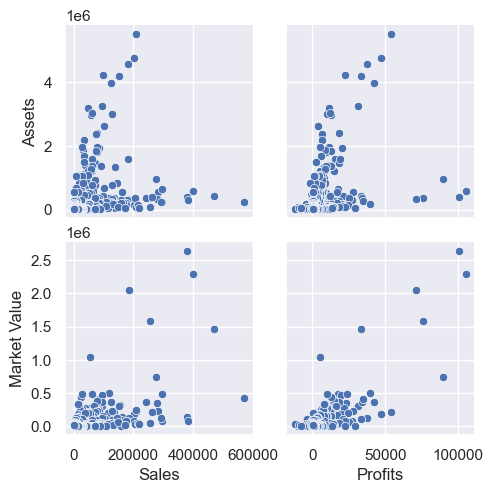

In [12]:
sns.pairplot(df,x_vars=['Sales','Profits'],y_vars=['Assets','Market Value'])

## Comparing the  measures of top 20 companies

([], [])

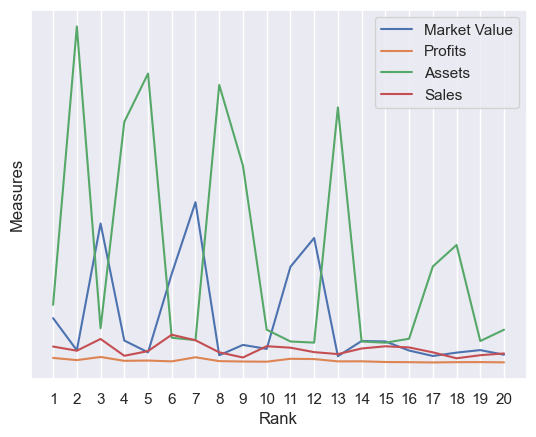

In [150]:
sns.lineplot(x=df['Rank'].head(20),y=df['Market Value'],label="Market Value")
sns.lineplot(x=df['Rank'].head(20),y=df['Profits'],label="Profits")
sns.lineplot(x=df['Rank'].head(20),y=df['Assets'],label="Assets")
sns.lineplot(x=df['Rank'].head(20),y=df['Sales'],label="Sales")
plt.legend()
plt.ylabel("Measures")
plt.yticks([])

### The Value for assets is quite high for the Banking companies
### maxima of market value and minima of assets lie at common points and vice versa.

## Correlation matrix to find any correlation between the features

C:\Users\Keshav\AppData\Local\Temp\ipykernel_14148\284774387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="RdBu")


<Axes: >

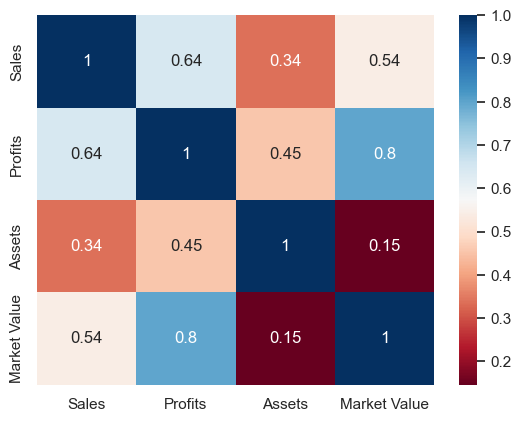

In [151]:
sns.heatmap(df.corr(),annot=True,cmap="RdBu")

## Market Value and Profit is having a very high correlation
### We can drop anyone if correlation is high enough

In [152]:
df

,Rank,Company,Industry,Country,Sales,Profits,Assets,Market Value
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325
...,...,...,...,...,...,...,...,...
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37,1408.3,166,1136
1996,1997,NMDC,Materials,India,3520,1406.4,5715,6401
1997,1997,Sichuan Changhong Electric,Consumer Durables,China,15716,53.1,12105,1957
1998,1999,Satellite Chemical,Chemicals,China,4413,931.3,7640,9521


In [153]:
df.to_csv('final_forbes.csv', index=False)